<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import datetime
  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score 
import warnings

### Data Collection

In [2]:
test = pd.read_csv('data_cleaned_duration.csv')

In [3]:
test = test.head(5000)

In [4]:
test.dropna(inplace=True)

In [5]:
test

,text,label,duration
0,info,1,519
1,saya mau tanya jadwal pembuatan kartu mahasisw...,0,756
3,semalam saya tari tunai tapi uang tidak keluar...,-1,927
4,complain mbk,-1,655
5,pertanyaan umum,-1,643
...,...,...,...
4994,kok gak ada ya,-1,685
4995,apakah bisa login kalau nomor hp hilang,0,634
4996,bingung,-1,782
4998,saya tidak bisa akses bri mobile versi lama kak,0,1385


In [6]:
def label_normalize(label): 
    return label+1

In [7]:
test['label'] = test['label'].apply(lambda label: label_normalize(label))

In [8]:
test['label']

0       2
1       1
3       0
4       0
5       0
       ..
4994    0
4995    1
4996    0
4998    1
4999    1
Name: label, Length: 4847, dtype: int64

In [9]:
test.head(11)

,text,label,duration
0,info,2,519
1,saya mau tanya jadwal pembuatan kartu mahasisw...,1,756
3,semalam saya tari tunai tapi uang tidak keluar...,0,927
4,complain mbk,0,655
5,pertanyaan umum,0,643
6,briguna karya,1,470
7,ya,0,3109
8,oh ya,1,646
9,apa yang harus saya bawa ke bank bri terdekat ...,1,876
10,penanganan uang yg setor tunai macet di atm em...,1,886


In [10]:
test.isnull().any()

text        False
label       False
duration    False
dtype: bool

In [11]:
test.dropna(inplace=True)

### EDA

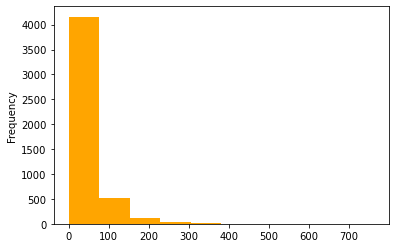

In [12]:
# checking the distribution of tweets in the data

length_test = test['text'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [13]:
# adding a column to represent the length of the tweet

test['len'] = test['text'].str.len()

test.head(10)

,text,label,duration,len
0,info,2,519,4
1,saya mau tanya jadwal pembuatan kartu mahasisw...,1,756,69
3,semalam saya tari tunai tapi uang tidak keluar...,0,927,85
4,complain mbk,0,655,12
5,pertanyaan umum,0,643,15
6,briguna karya,1,470,13
7,ya,0,3109,2
8,oh ya,1,646,5
9,apa yang harus saya bawa ke bank bri terdekat ...,1,876,108
10,penanganan uang yg setor tunai macet di atm em...,1,886,59


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

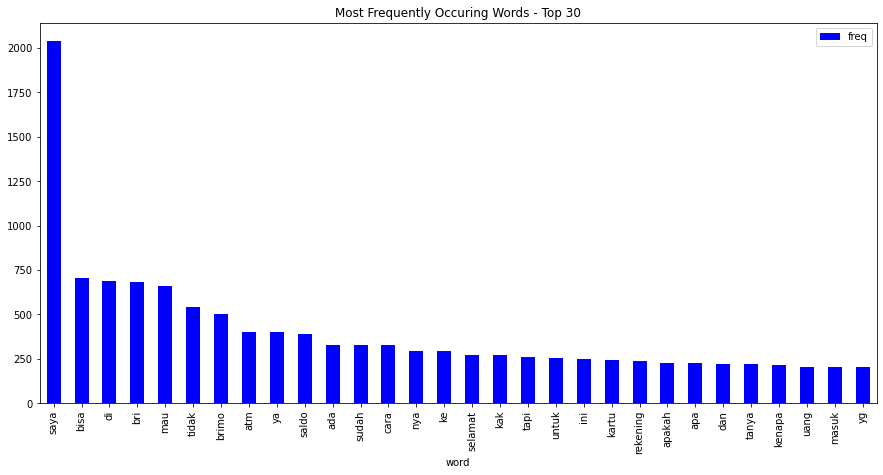

In [14]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(test.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary')

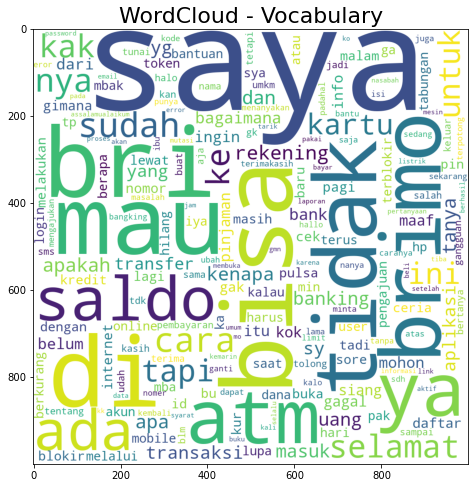

In [15]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary", fontsize = 22)

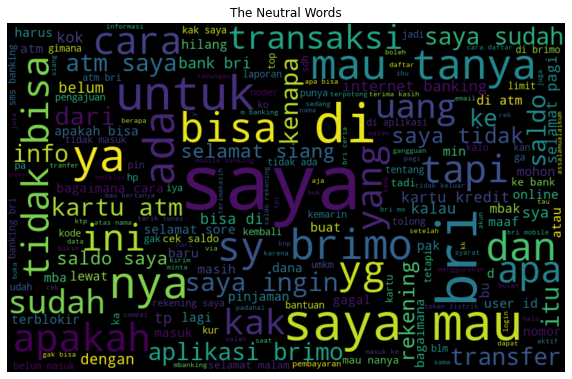

In [16]:
normal_words =' '.join([text for text in test['text'][test['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

### Preprocessing

In [17]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
test

,text,label,duration,len
0,info,2,519,4
1,saya mau tanya jadwal pembuatan kartu mahasisw...,1,756,69
3,semalam saya tari tunai tapi uang tidak keluar...,0,927,85
4,complain mbk,0,655,12
5,pertanyaan umum,0,643,15
...,...,...,...,...
4994,kok gak ada ya,0,685,14
4995,apakah bisa login kalau nomor hp hilang,1,634,39
4996,bingung,0,782,7
4998,saya tidak bisa akses bri mobile versi lama kak,1,1385,47


In [19]:
test['text'].iloc[2]

'semalam saya tari tunai tapi uang tidak keluar dari atm tapi saldo rekening berkurang'

In [20]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
test_corpus = test['text'].tolist()
x_test = cv.fit_transform(test_corpus)

print(x_test.shape)


(4847, 4148)


In [21]:
x_test

<4847x4148 sparse matrix of type '<class 'numpy.int64'>'
	with 34677 stored elements in Compressed Sparse Row format>

In [22]:
y_test = test['label']

In [30]:
test.drop(columns = ['duration','len'], inplace=True)

In [31]:
test

,text,label
0,info,2
1,saya mau tanya jadwal pembuatan kartu mahasisw...,1
3,semalam saya tari tunai tapi uang tidak keluar...,0
4,complain mbk,0
5,pertanyaan umum,0
...,...,...
4994,kok gak ada ya,0
4995,apakah bisa login kalau nomor hp hilang,1
4996,bingung,0
4998,saya tidak bisa akses bri mobile versi lama kak,1


### Training

In [19]:
#splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_test, test["label"], test_size = 0.20, random_state = 42)


In [44]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [45]:
type(x_test)

scipy.sparse.csr.csr_matrix

In [46]:
estimator_param = [25, 50, 75, 100]
depth_param = [5, 10, 15, 20]

In [47]:
from sklearn.ensemble import RandomForestClassifier

for i in estimator_param:
    for j in depth_param:
        print("param",i, j)
        model = RandomForestClassifier(n_estimators=i, min_samples_leaf=20, max_depth=j)
        model.fit(x_train, y_train)


        a = datetime.datetime.now()
        y_pred = model.predict(x_valid)
        b = datetime.datetime.now()

        print("Inference Time(ms): ", (b-a).microseconds / 1000)
        print("Training Accuracy :", model.score(x_train, y_train))
        print("Validation Accuracy :", model.score(x_valid, y_valid))

        # calculating the f1 score for the validation set
        print("f1 score :", f1_score(y_valid, y_pred, average="weighted"))

param 25 5
Inference Time(ms):  105.767
Training Accuracy : 0.642765024503482
Validation Accuracy : 0.6381443298969072
f1 score : 0.4971823035949472
param 25 10
Inference Time(ms):  27.83
Training Accuracy : 0.642765024503482
Validation Accuracy : 0.6381443298969072
f1 score : 0.4971823035949472
param 25 15
Inference Time(ms):  28.158
Training Accuracy : 0.642765024503482
Validation Accuracy : 0.6381443298969072
f1 score : 0.4971823035949472
param 25 20
Inference Time(ms):  27.638
Training Accuracy : 0.642765024503482
Validation Accuracy : 0.6381443298969072
f1 score : 0.4971823035949472
param 50 5
Inference Time(ms):  41.385
Training Accuracy : 0.642765024503482
Validation Accuracy : 0.6381443298969072
f1 score : 0.4971823035949472
param 50 10
Inference Time(ms):  40.404
Training Accuracy : 0.642765024503482
Validation Accuracy : 0.6381443298969072
f1 score : 0.4971823035949472
param 50 15
Inference Time(ms):  39.022
Training Accuracy : 0.642765024503482
Validation Accuracy : 0.638144

In [48]:
import lightgbm as lgb

x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_valid = x_valid.astype('float32')
y_valid = y_valid.astype('float32')

for i in estimator_param:
    for j in depth_param:
        print("param",i, j)

        model = lgb.LGBMClassifier(n_estimators=i, learning_rate=0.2, min_data_in_leaf=20, max_depth=j)
        model.fit(x_train, y_train)

        a = datetime.datetime.now()
        y_pred = model.predict(x_valid)
        b = datetime.datetime.now()

        print("Inference Time(ms): ", (b-a).microseconds / 1000)
        print("Training Accuracy :", model.score(x_train, y_train))
        print("Validation Accuracy :", model.score(x_valid, y_valid))

        # calculating the f1 score for the validation set
        print("f1 score :", f1_score(y_valid, y_pred, average="weighted"))

param 25 5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Inference Time(ms):  17.454
Training Accuracy : 0.6904823316997679
Validation Accuracy : 0.6701030927835051
f1 score : 0.5935630577009964
param 25 10
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Inference Time(ms):  45.203
Training Accuracy : 0.7608976012380707
Validation Accuracy : 0.7154639175257732
f1 score : 0.6949219821246975
param 25 15
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Inference Time(ms):  41.151
Training Accuracy : 0.7792107299458344
Validation Accuracy : 0.7175257731958763
f1 score : 0.7039182792713998
param 25 20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
Inference Time(ms):  69.871
Training Accuracy : 0.7

In [49]:
from xgboost import XGBClassifier


for i in estimator_param:
    for j in depth_param:
        print("param",i, j)
        model = XGBClassifier(n_estimators=i, learning_rate=0.2, max_depth=j)
        model.fit(x_train, y_train)

        a = datetime.datetime.now()
        y_pred = model.predict(x_valid)
        b = datetime.datetime.now()

        print("Inference Time(ms): ", (b-a).microseconds / 1000)
        print("Training Accuracy :", model.score(x_train, y_train))
        print("Validation Accuracy :", model.score(x_valid, y_valid))

        # calculating the f1 score for the validation set
        print("f1 score :", f1_score(y_valid, y_pred, average="weighted"))


param 25 5


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:51:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  98.73
Training Accuracy : 0.6922878514315192
Validation Accuracy : 0.6659793814432989
f1 score : 0.5728578465365004
param 25 10


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:52:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  94.116
Training Accuracy : 0.7526437967500644
Validation Accuracy : 0.6938144329896907
f1 score : 0.6384090685279753
param 25 15


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:54:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  112.04
Training Accuracy : 0.8233169976786174
Validation Accuracy : 0.7134020618556701
f1 score : 0.7006966294263844
param 25 20


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:58:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  186.435
Training Accuracy : 0.8418880577766314
Validation Accuracy : 0.7195876288659794
f1 score : 0.708834399633719
param 50 5


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:03:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  106.115
Training Accuracy : 0.7322672169202992
Validation Accuracy : 0.6855670103092784
f1 score : 0.6237206846311856
param 50 10


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:05:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  242.246
Training Accuracy : 0.827959762703121
Validation Accuracy : 0.711340206185567
f1 score : 0.6931109024247345
param 50 15


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:09:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  124.067
Training Accuracy : 0.8583956667526438
Validation Accuracy : 0.7175257731958763
f1 score : 0.7064749999980561
param 50 20


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:16:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  195.966
Training Accuracy : 0.8749032757286562
Validation Accuracy : 0.7144329896907217
f1 score : 0.7038712662375863
param 75 5


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:25:39] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  160.455
Training Accuracy : 0.7632189837503224
Validation Accuracy : 0.7010309278350515
f1 score : 0.6562578054299759
param 75 10


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:29:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  113.254
Training Accuracy : 0.8501418622646376
Validation Accuracy : 0.722680412371134
f1 score : 0.7096909768389081
param 75 15


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:35:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  150.539
Training Accuracy : 0.8774825896311581
Validation Accuracy : 0.7134020618556701
f1 score : 0.7021567098506898
param 75 20


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:45:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  192.707
Training Accuracy : 0.8927005416559195
Validation Accuracy : 0.7268041237113402
f1 score : 0.7181865407096928
param 100 5


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:59:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  130.817
Training Accuracy : 0.8132576734588599
Validation Accuracy : 0.7123711340206186
f1 score : 0.6919255026487826
param 100 10


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:03:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  151.183
Training Accuracy : 0.8638122259478979
Validation Accuracy : 0.7216494845360825
f1 score : 0.7098306540029821
param 100 15


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:12:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  245.698
Training Accuracy : 0.8885736394119165
Validation Accuracy : 0.7134020618556701
f1 score : 0.7029329897556161
param 100 20


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:25:38] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Inference Time(ms):  330.513
Training Accuracy : 0.9017281403146763
Validation Accuracy : 0.7257731958762886
f1 score : 0.7169572848231682


In [ ]:
from sklearn.model_selection import GridSearchCV
PARAMS = {
    'min_samples_leaf': [5,10,15,20],
    'max_leaf_nodes': [None,5,10,15,20],
    'min_samples_split': [5,10,15,20]
}
rf = RandomForestClassifier(max_features=None)
clf = GridSearchCV(estimator=rf, param_grid=PARAMS, scoring='f1_weighted', cv=5, n_jobs=-1, verbose=10)
result = clf.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
PARAMS = {
    'min_data_in_leaf': [10, 20, 30, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2, 0.4, 0.5],
    'num_leaves': [10, 20, 31, 40, 50]
} 
rf = lgb.LGBMClassifier(max_features=None)
clf = GridSearchCV(estimator=rf, param_grid=PARAMS, scoring='f1_weighted', cv=5, n_jobs=-1)
result = clf.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
import xgboost
PARAMS = {
    'learning_rate': [0.01,0.05, 0.1],
    'min_child_weight': [1, 5, 10],
    'lambda' : [0.01, 0.1, 0],
    'alpha' : [0.01, 0.1, 0]
}
rf = xgboost.XGBClassifier()
clf = GridSearchCV(estimator=rf, param_grid=PARAMS, scoring='f1_weighted', cv=3, n_jobs=-1, verbose=10)
result = clf.fit(x_train, y_train)

print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)